# Lung Cancer ML Classification 🫁

## Import Libraries

In [53]:
# Scientific
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# MAchine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,\
                            recall_score,\
                            accuracy_score,\
                            f1_score,\
                            confusion_matrix,\
                            ConfusionMatrixDisplay,\
                            classification_report


## Load Dataset

In [54]:
data = pd.read_csv(r'../data/cancer patient data sets.csv')

## Data Exploration & Preproccessing

In [55]:
data.head(10)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [56]:
# lowercase all feature names
data.rename(str.lower, axis='columns', inplace=True)

In [58]:
# replace space with underscore
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, inplace=True)

In [59]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [60]:
data.columns

Index(['index', 'patient_id', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level'],
      dtype='object')

In [62]:
# Drop redundant features
data.drop(['index', 'patient_id', ], axis=1, inplace=True)

In [63]:
data.shape

(1000, 24)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                  

In [65]:
np.unique(data.level, return_counts=True)

(array(['High', 'Low', 'Medium'], dtype=object), array([365, 303, 332]))

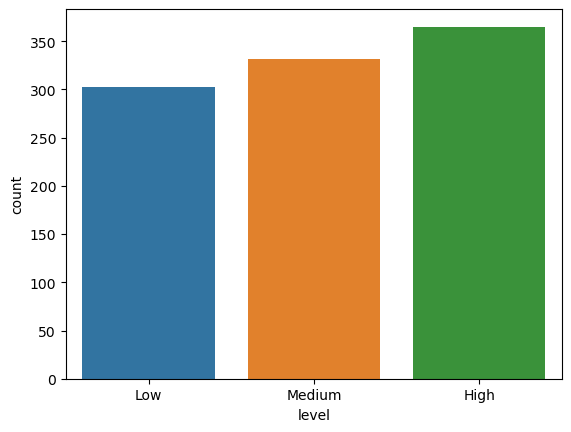

In [66]:
sns.countplot(data=data, x='level')
plt.show()

In [67]:
data.replace({'level':{'Low': 1, 'Medium': 2, 'High': 3}}, inplace=True)

In [100]:
data.describe().iloc[1:, ].T.style.background_gradient(axis=1)

,mean,std,min,25%,50%,75%,max
age,37.174000,12.005493,14.000000,27.750000,36.000000,45.000000,73.000000
gender,1.402000,0.490547,1.000000,1.000000,1.000000,2.000000,2.000000
air_pollution,3.840000,2.030400,1.000000,2.000000,3.000000,6.000000,8.000000
alcohol_use,4.563000,2.620477,1.000000,2.000000,5.000000,7.000000,8.000000
dust_allergy,5.165000,1.980833,1.000000,4.000000,6.000000,7.000000,8.000000
occupational_hazards,4.840000,2.107805,1.000000,3.000000,5.000000,7.000000,8.000000
genetic_risk,4.580000,2.126999,1.000000,2.000000,5.000000,7.000000,7.000000
chronic_lung_disease,4.380000,1.848518,1.000000,3.000000,4.000000,6.000000,7.000000
balanced_diet,4.491000,2.135528,1.000000,2.000000,4.000000,7.000000,7.000000
obesity,4.465000,2.124921,1.000000,3.000000,4.000000,7.000000,7.000000


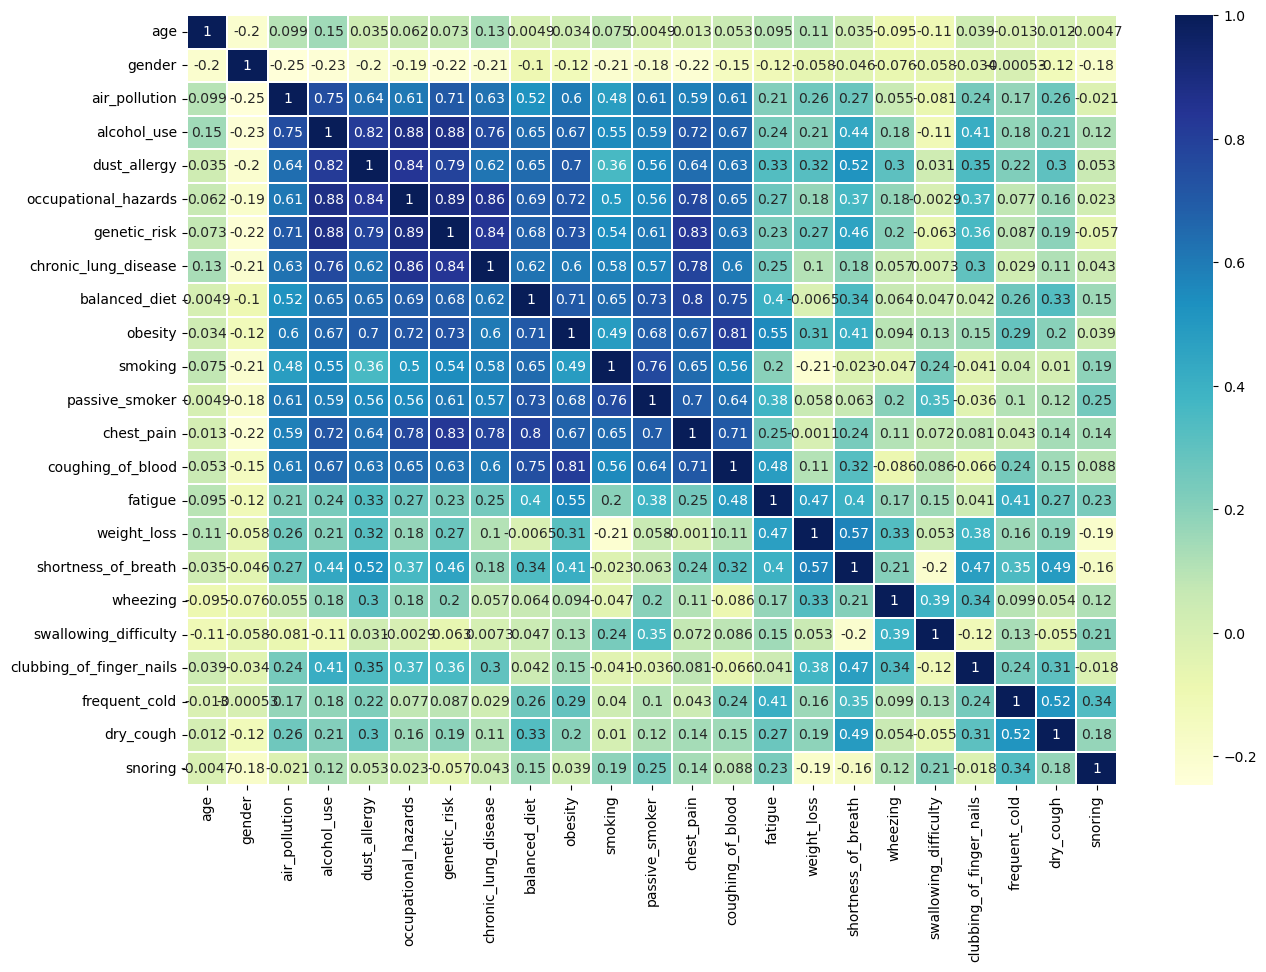

In [69]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop('level', axis=1).corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

In [71]:
np.unique(data['air_pollution'], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([141, 201, 173,  90,  20, 326,  30,  19]))

In [72]:
np.unique(data['alcohol_use'], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([152, 202,  80,  41,  90,  80, 167, 188]))

## Train Test Split

In [73]:
X = data.drop('level', axis=1)
y = data.level

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

## Fit Model

### Logistic regression

In [103]:
lr_model = LogisticRegression(solver='liblinear')
_ = lr_model.fit(X_train,y_train)

In [104]:
y_pred_lr = lr_model.predict(X_test)

In [105]:
lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of LogisticRegression: {lr_acc}")

lr_precision = precision_score(y_test, y_pred_lr, average = 'micro')
print(f"Precision of LogisticRegression: {lr_precision}")

lr_recall = recall_score(y_test, y_pred_lr, average = 'micro')
print(f"Recall of LogisticRegression: {lr_recall}")

lr_f1 = f1_score(y_test, y_pred_lr, average = 'micro')
print(f"F1 of LogisticRegression: {lr_f1}")

print('\n__________________Classification Report__________________')
print(classification_report(y_test, y_pred_lr))

Accuracy of LogisticRegression: 0.9866666666666667
Precision of LogisticRegression: 0.9866666666666667
Recall of LogisticRegression: 0.9866666666666667
F1 of LogisticRegression: 0.9866666666666668

__________________Classification Report__________________
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        91
           2       1.00      0.96      0.98       100
           3       1.00      1.00      1.00       109

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



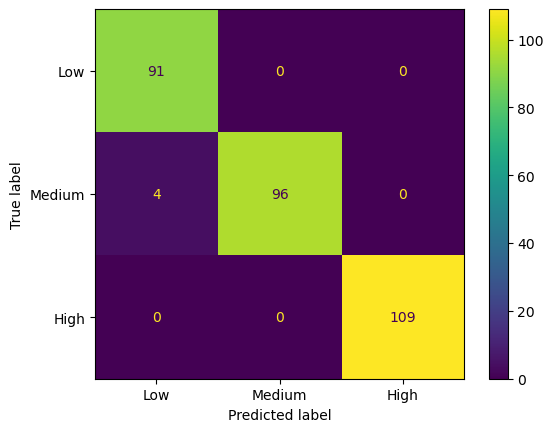

In [106]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr), display_labels=['Low', 'Medium', 'High'])
cm.plot()
plt.show()

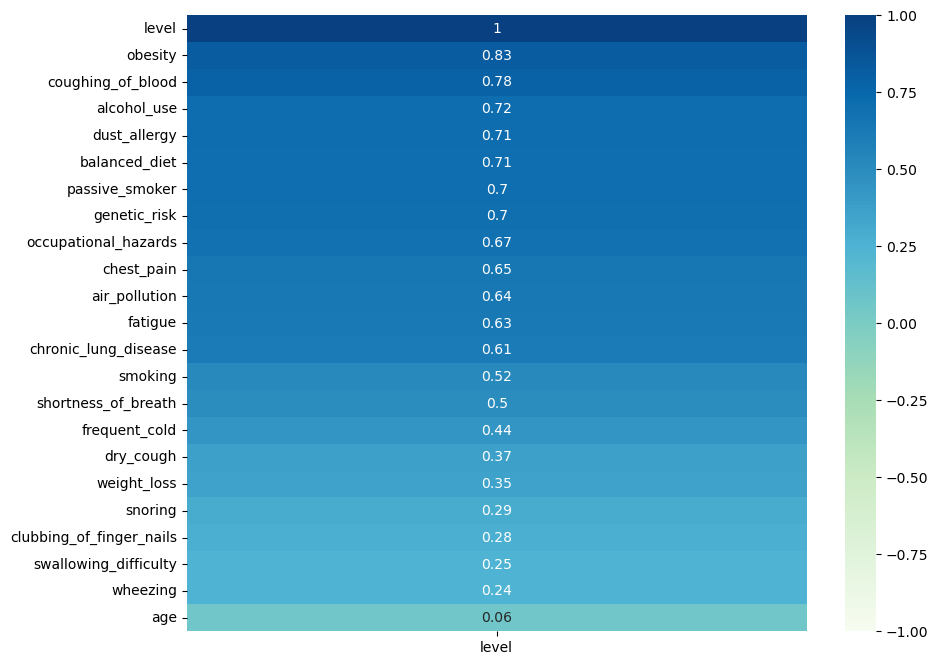

In [79]:
top_correlations = data.corr()[['level']].sort_values(by='level', ascending=False).head(23)

plt.figure(figsize=(10, 8))  
sns.heatmap(top_correlations, vmin=-1, vmax=1, annot=True, cmap='GnBu')
plt.show()

### RandomForest Classifier

In [80]:
rf_model = RandomForestClassifier(max_depth=5, n_estimators= 6, random_state=0)
_ = rf_model.fit(X_train,y_train)

In [81]:
y_pred_rf = rf_model.predict(X_test)

In [82]:
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of RandomForest: {rf_acc}")

rf_precision = precision_score(y_test, y_pred_rf, average = 'micro')
print(f"Precision of RandomForest: {rf_precision}")

rf_recall = recall_score(y_test, y_pred_rf, average = 'micro')
print(f"Recall of RandomForest: {rf_recall}")

rf_f1 = f1_score(y_test, y_pred_rf, average = 'micro')
print(f"F1 of RandomForest: {rf_f1}")

print('\n__________________Classification Report__________________')
print(classification_report(y_test, y_pred_rf))

Accuracy of RandomForest: 1.0
Precision of RandomForest: 1.0
Recall of RandomForest: 1.0
F1 of RandomForest: 1.0

__________________Classification Report__________________
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



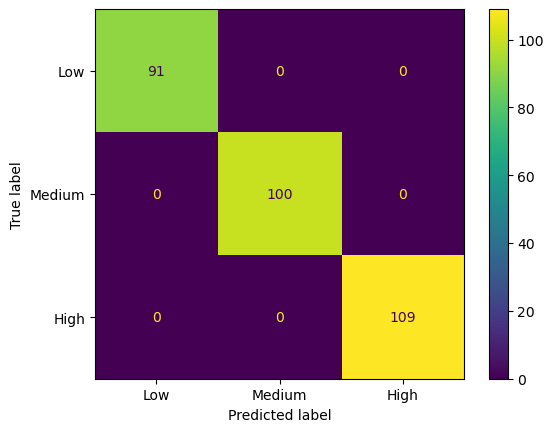

In [83]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Low', 'Medium', 'High'])
cm.plot()
plt.show()

### MLP

In [84]:
nn_model = MLPClassifier(random_state=1, max_iter=300)
_ = nn_model.fit(X_train,y_train)

In [85]:
y_pred_nn = nn_model.predict(X_test)

In [86]:
nn_acc = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy of Multi-Layer-Perceptron: {nn_acc}")

nn_precision = precision_score(y_test, y_pred_nn, average = 'micro')
print(f"Precision of Multi-Layer-Perceptron: {nn_precision}")

nn_recall = recall_score(y_test, y_pred_nn, average = 'micro')
print(f"Recall of Multi-Layer-Perceptron: {nn_recall}")

nn_f1 = f1_score(y_test, y_pred_nn, average = 'micro')
print(f"F1 of Multi-Layer-Perceptron: {nn_f1}")

print('\n__________________Classification Report__________________')
print(classification_report(y_test, y_pred_nn))

Accuracy of Multi-Layer-Perceptron: 1.0
Precision of Multi-Layer-Perceptron: 1.0
Recall of Multi-Layer-Perceptron: 1.0
F1 of Multi-Layer-Perceptron: 1.0

__________________Classification Report__________________
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



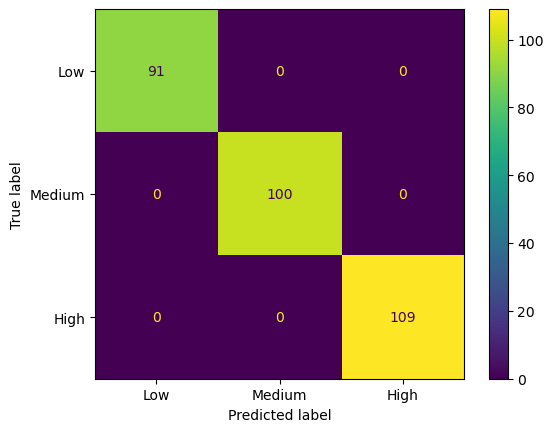

In [87]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nn), display_labels=['Low', 'Medium', 'High'])
cm.plot()
plt.show()

## Decision Tree

In [88]:
dt_model = DecisionTreeClassifier()
_ = dt_model.fit(X_train,y_train)

In [89]:
y_pred_dt = dt_model.predict(X_test)

In [90]:
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of Decision Tree: {dt_acc}")

dt_precision = precision_score(y_test, y_pred_dt, average = 'micro')
print(f"Precision of Decision Tree: {dt_precision}")

dt_recall = recall_score(y_test, y_pred_dt, average = 'micro')
print(f"Recall of Decision Tree: {dt_recall}")

dt_f1 = f1_score(y_test, y_pred_dt, average = 'micro')
print(f"F1 of Decision Tree: {dt_f1}")

print('\n__________________Classification Report__________________')
print(classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree: 1.0
Precision of Decision Tree: 1.0
Recall of Decision Tree: 1.0
F1 of Decision Tree: 1.0

__________________Classification Report__________________
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



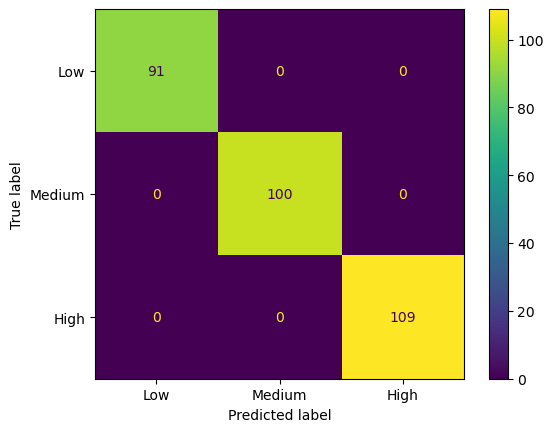

In [91]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels=['Low', 'Medium', 'High'])
cm.plot()
plt.show()

### KNN

In [130]:
list_of_neighbors = np.arange(1,101)
accs = []

In [131]:
for nn in list_of_neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=nn)
    _ = knn_model.fit(X_train,y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_acc = accuracy_score(y_test, y_pred_knn)
    print(f"{nn}, Accuracy of K-Nearest Neighbors: {knn_acc}")
    accs.append(knn_acc)

1, Accuracy of K-Nearest Neighbors: 0.9933333333333333
2, Accuracy of K-Nearest Neighbors: 0.9933333333333333
3, Accuracy of K-Nearest Neighbors: 0.9933333333333333
4, Accuracy of K-Nearest Neighbors: 0.9933333333333333
5, Accuracy of K-Nearest Neighbors: 0.9933333333333333
6, Accuracy of K-Nearest Neighbors: 0.9933333333333333
7, Accuracy of K-Nearest Neighbors: 0.9933333333333333
8, Accuracy of K-Nearest Neighbors: 0.9933333333333333
9, Accuracy of K-Nearest Neighbors: 0.9933333333333333
10, Accuracy of K-Nearest Neighbors: 0.9933333333333333
11, Accuracy of K-Nearest Neighbors: 0.98
12, Accuracy of K-Nearest Neighbors: 0.98
13, Accuracy of K-Nearest Neighbors: 0.9533333333333334
14, Accuracy of K-Nearest Neighbors: 0.95
15, Accuracy of K-Nearest Neighbors: 0.94
16, Accuracy of K-Nearest Neighbors: 0.94
17, Accuracy of K-Nearest Neighbors: 0.92
18, Accuracy of K-Nearest Neighbors: 0.94
19, Accuracy of K-Nearest Neighbors: 0.9333333333333333
20, Accuracy of K-Nearest Neighbors: 0.9333

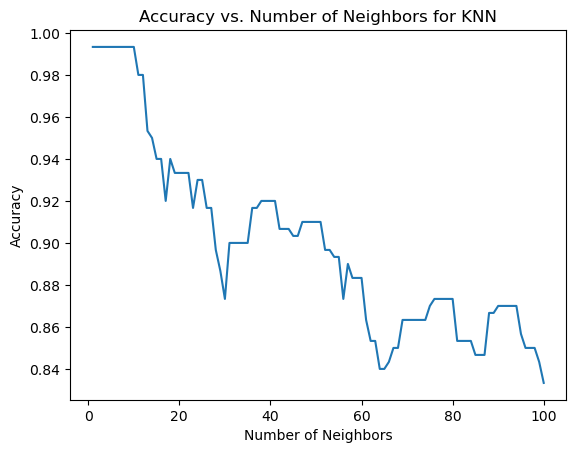

In [133]:
sns.lineplot(x=list_of_neighbors, y=accs)
plt.title('Accuracy vs. Number of Neighbors for KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [135]:
knn_model = KNeighborsClassifier(n_neighbors=5)
_ = knn_model.fit(X_train,y_train)

In [136]:
y_pred_knn = knn_model.predict(X_test)

In [137]:
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of K-Nearest Neighbors: {knn_acc}")

knn_precision = precision_score(y_test, y_pred_knn, average = 'micro')
print(f"Precision of K-Nearest Neighbors: {knn_precision}")

knn_recall = recall_score(y_test, y_pred_knn, average = 'micro')
print(f"Recall of K-Nearest Neighbors: {knn_recall}")

knn_f1 = f1_score(y_test, y_pred_knn, average = 'micro')
print(f"F1 of K-Nearest Neighbors: {knn_f1}")

print('\n__________________Classification Report__________________')
print(classification_report(y_test, y_pred_knn))

Accuracy of K-Nearest Neighbors: 0.9933333333333333
Precision of K-Nearest Neighbors: 0.9933333333333333
Recall of K-Nearest Neighbors: 0.9933333333333333
F1 of K-Nearest Neighbors: 0.9933333333333333

__________________Classification Report__________________
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        91
           2       0.98      1.00      0.99       100
           3       1.00      1.00      1.00       109

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



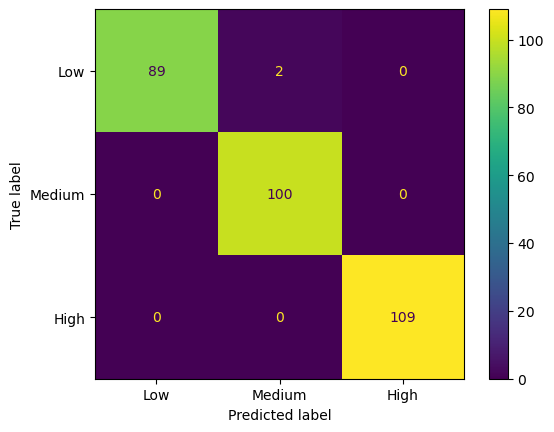

In [138]:
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=['Low', 'Medium', 'High'])
cm.plot()
plt.show()